In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [2]:
amzn = pd.read_csv("newAMZN.csv")

amzn.head()

,Unnamed: 0,ticker,date,open,high,low,close,volume,dividend,split,...,std,mom,adx,obv,atr,cci,macd,trix,next_close,direction
0,0,AMZN,2010-07-09,116.55,117.40,114.6500,117.26,4065100,0.0,1.0,...,7.60445,-8.570,42.1885,568738953.0,4.3949,10.0323,-3.2751,-0.4171,119.51,1.0
1,1,AMZN,2010-07-12,117.81,119.70,117.3200,119.51,4783600,0.0,1.0,...,7.23980,-3.040,40.3568,573522553.0,4.2553,54.0998,-2.6973,-0.4018,123.65,1.0
2,2,AMZN,2010-07-13,120.69,124.88,120.3000,123.65,7091100,0.0,1.0,...,7.46150,1.343,37.7826,580613653.0,4.3349,118.6985,-1.8835,-0.3691,123.30,-1.0
3,3,AMZN,2010-07-14,123.03,123.75,121.4749,123.30,5257000,0.0,1.0,...,7.72890,1.850,35.3923,575356653.0,4.1878,113.5880,-1.2524,-0.3263,122.06,-1.0
4,4,AMZN,2010-07-15,120.13,122.48,119.2600,122.06,6047700,0.0,1.0,...,8.06685,3.730,33.1634,569308953.0,4.1772,83.3299,-0.8426,-0.2803,118.49,-1.0


'tensorflow' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
spy = pd.read_csv("spy.csv")
spy.columns


Index(['Unnamed: 0', 'ticker', 'date', 'open', 'high', 'low', 'close',
       'volume', 'dividend', 'split', 'adj_close', 'sma', 'rsi', 'slowd',
       'slowk', 'roc', 'willr', 'std', 'mom', 'adx', 'obv', 'atr', 'cci',
       'macd', 'trix', 'next_close', 'direction'],
      dtype='object')

In [4]:
spyi=spy[['date','adj_close', 'sma', 'rsi', 'slowd',
       'slowk', 'roc', 'willr', 'std', 'mom', 'adx', 'obv', 'atr', 'cci',
       'macd', 'trix']]
spyidx=spyi.add_prefix('s_')
spyidx.head()

,s_date,s_adj_close,s_sma,s_rsi,s_slowd,s_slowk,s_roc,s_willr,s_std,s_mom,s_adx,s_obv,s_atr,s_cci,s_macd,s_trix
0,2010-07-09,88.2266,106.3943,50.6201,73.0817,98.4491,-3.3742,-43.4134,4.18525,-3.77,31.8911,2.712688e+09,2.1703,31.2417,-1.4158,-0.2092
1,2010-07-12,88.2838,106.1529,50.8352,90.3016,98.1965,-3.0338,-35.9331,3.71105,-3.38,30.3314,2.843649e+09,2.0931,49.0562,-1.1685,-0.1989
2,2010-07-13,89.6158,106.1593,55.6767,97.8217,96.8195,0.0821,-4.7991,3.72450,0.09,28.4013,3.056193e+09,2.0907,106.0754,-0.8314,-0.1811
3,2010-07-14,89.6077,106.1893,55.6405,96.1264,93.3633,0.3845,-4.9107,3.78325,0.42,26.5727,2.871863e+09,2.0285,103.6809,-0.5586,-0.1588
4,2010-07-15,89.6322,106.3507,55.7335,93.4406,90.1390,2.1039,-4.5759,3.99615,2.26,24.8394,3.103545e+09,2.0186,89.5847,-0.3362,-0.1343


In [10]:
newamzn=pd.concat([amzn,spyidx],axis=1)

newamzn.columns


Index(['Unnamed: 0', 'ticker', 'date', 'open', 'high', 'low', 'close',
       'volume', 'dividend', 'split', 'adj_close', 'sma', 'rsi', 'slowd',
       'slowk', 'roc', 'willr', 'std', 'mom', 'adx', 'obv', 'atr', 'cci',
       'macd', 'trix', 'next_close', 'direction', 's_date', 's_adj_close',
       's_sma', 's_rsi', 's_slowd', 's_slowk', 's_roc', 's_willr', 's_std',
       's_mom', 's_adx', 's_obv', 's_atr', 's_cci', 's_macd', 's_trix'],
      dtype='object')

/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


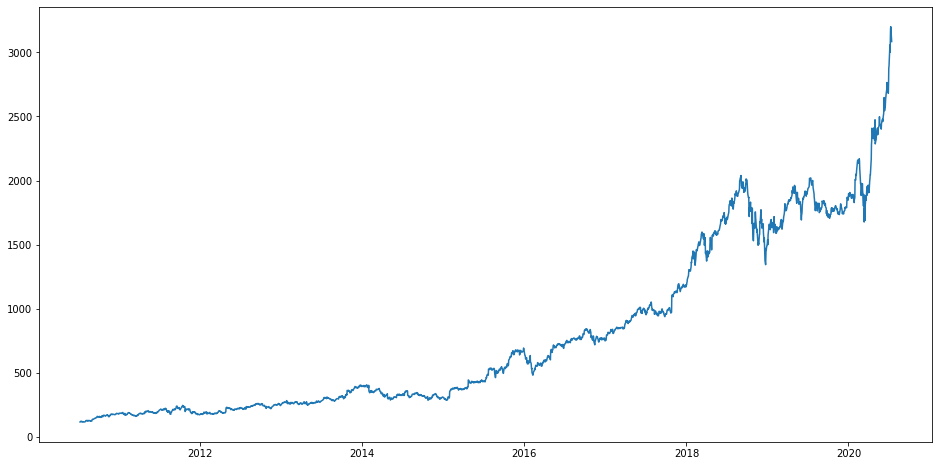

In [16]:

#plot the stock close price over date
df=newamzn[['date', 'open', 'high', 'low', 'close','volume']]
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['date']
plt.figure(figsize=(16,8))
plt.plot(df["close"],label='Close Price history')

In [49]:
#Sort the dataset on date time and filter “Date” and “Close” columns:

df=newamzn[['date', 'open', 'high', 'low', 'close','volume']]
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','close'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [50]:
new_dataset.drop("date",axis=1,inplace=True)

In [52]:
#Normalize the new filtered datasetand split data to train and test dataset:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:1200,:]
valid_data=final_dataset[1200:,:]
#new_dataset.set_index('date',inplace=True)
#new_dataset.drop("date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [54]:
#Build and train the LSTM model:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

Epoch 1/1
 - 189s - loss: 3.9670e-05


In [55]:
#Take a sample of a dataset to make stock price predictions using the LSTM model:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

(1140, 60, 1)

In [58]:
from keras.models import load_model
lstm_model.save("saved_model.h5")

AttributeError: module 'keras.optimizers' has no attribute 'TFOptimizer'

/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


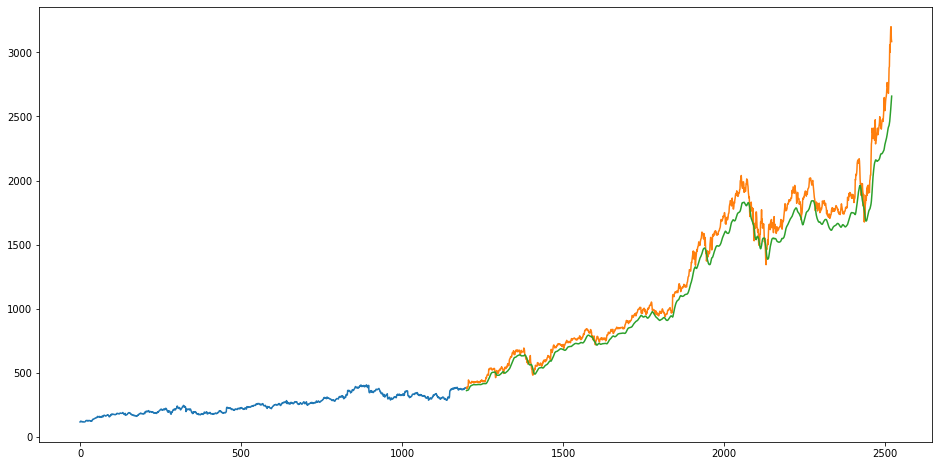

In [61]:
train_data=new_dataset[:1200]
valid_data=new_dataset[1200:]
valid_data['Predictions']=predicted_closing_price
plt.figure(figsize=(16,8))
plt.plot(train_data["close"])
plt.plot(valid_data[['close',"Predictions"]])